---
# <font color='blue'> Case Study 4 </font>


## <font color='blue'>Group</font>
* Helene Barrera
* Sam Vonpaays Soh
* Justin Ehly

## <font color='blue'>Business Understanding</font>
The objective of this project is to use RandomForest and XGBoost to accurately predict a company's likelihood to go into bankruptcy based on financial information provided in arff file formats. The financial data consists of a set of 64 attributes each one containing data such as net profits by total assets or total assets by total liabilities. Typically a decision maker may be able to pick out a few traditional attributes to guide their gut feeling on a company to invest in or give a loan to. However, the benefit of the two machine learning models in our study is that they can analysis at a wide variety of attributes, many of which are very similar to each other, and determine which ones are empirically the most important, regardless of conventional knowledge. And, if the most important attributes happen to be those that are frequently used anyways, at least there is data backing that up. 

## <font color='blue'>Data Evaluation/ Engineering</font>
Upon reviewing the data, it was clear that it needed some cleaning before putting it in a model. The exploritory data analysis and data preparation will be summarized at the bottom of the section following the code. 

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import os
import glob


os.getcwd()            

'C:\\Users\\Helene\\Quantifying The World\\Case Study 4'

In [2]:
#os.chdir(r'C:\Users\justi\Google Drive\_SMU\7333 - Quantifying the World\Case Study 4\data')

os.chdir(r'D:\\MS in Data Science\\Quantifying\\Case Study 4\\data')

from os import listdir
from os.path import isfile, join
#dir_files = [f for f in os.listdir(os.getcwd()+'/Case 4_data') if os.path.isfile(join(os.getcwd()+'/Case 4_data', f))]

# get list of all arff files
dir_files = glob.glob('*.arff')

dir_files

['1year.arff', '2year.arff', '3year.arff', '4year.arff', '5year.arff']

In [3]:
data_dict = {}
full_df = pd.DataFrame()

records = 0

for f in dir_files:
    #temp_data = arff.loadarff(os.getcwd()+'/Case 4_data/'+f)
    temp_data = arff.loadarff(f)
    temp_df = pd.DataFrame(temp_data[0])
    print(temp_df.shape)
    data_dict.update({f:temp_df})
    full_df = pd.concat([full_df, temp_df])
    records += temp_df.shape[0]
    
print(records)

(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)
43405


In [4]:
full_df.shape

(43405, 65)

In [5]:
full_df.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [6]:
full_df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,2.755425e+01,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,1.088350e+03,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,4.993325e+03,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,6.123700e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


#### First glance at the data

There appear to be some missing values and the attributes all have very different scales. Additionally the range of values for some attributes is enormous, while other attributes have very little variation of values. However since we are using decision trees the data will not need to be normalized. 

In [7]:
for c in full_df.columns:
    print('{} is formatted as a(n) {}'.format(c, full_df[c].dtype),', is missing: ',full_df[c].isna().sum(),'values')

Attr1 is formatted as a(n) float64 , is missing:  8 values
Attr2 is formatted as a(n) float64 , is missing:  8 values
Attr3 is formatted as a(n) float64 , is missing:  8 values
Attr4 is formatted as a(n) float64 , is missing:  134 values
Attr5 is formatted as a(n) float64 , is missing:  89 values
Attr6 is formatted as a(n) float64 , is missing:  8 values
Attr7 is formatted as a(n) float64 , is missing:  8 values
Attr8 is formatted as a(n) float64 , is missing:  94 values
Attr9 is formatted as a(n) float64 , is missing:  9 values
Attr10 is formatted as a(n) float64 , is missing:  8 values
Attr11 is formatted as a(n) float64 , is missing:  44 values
Attr12 is formatted as a(n) float64 , is missing:  134 values
Attr13 is formatted as a(n) float64 , is missing:  127 values
Attr14 is formatted as a(n) float64 , is missing:  8 values
Attr15 is formatted as a(n) float64 , is missing:  36 values
Attr16 is formatted as a(n) float64 , is missing:  95 values
Attr17 is formatted as a(n) float64 , 

In [8]:
full_df['class'].unique()

array([b'0', b'1'], dtype=object)

In [9]:
full_df['class'].value_counts(normalize=False)

b'0'    41314
b'1'     2091
Name: class, dtype: int64

In [10]:
full_df['class'].value_counts(normalize=True)

b'0'    0.951826
b'1'    0.048174
Name: class, dtype: float64

In [11]:
classes = []

for index, row in full_df.iterrows():
    class_val = row['class']
    if class_val not in classes:
        classes.append(class_val)

In [12]:
classes

[b'0', b'1']

In [13]:
class_dict = {}

for index, i in enumerate(classes):
    class_dict.update({i:str(index)})
    
class_dict

{b'0': '0', b'1': '1'}

In [14]:
full_df['class'] = full_df['class'].map(class_dict)

In [15]:
full_df['class'].unique()

array(['0', '1'], dtype=object)

---
### EDA
---

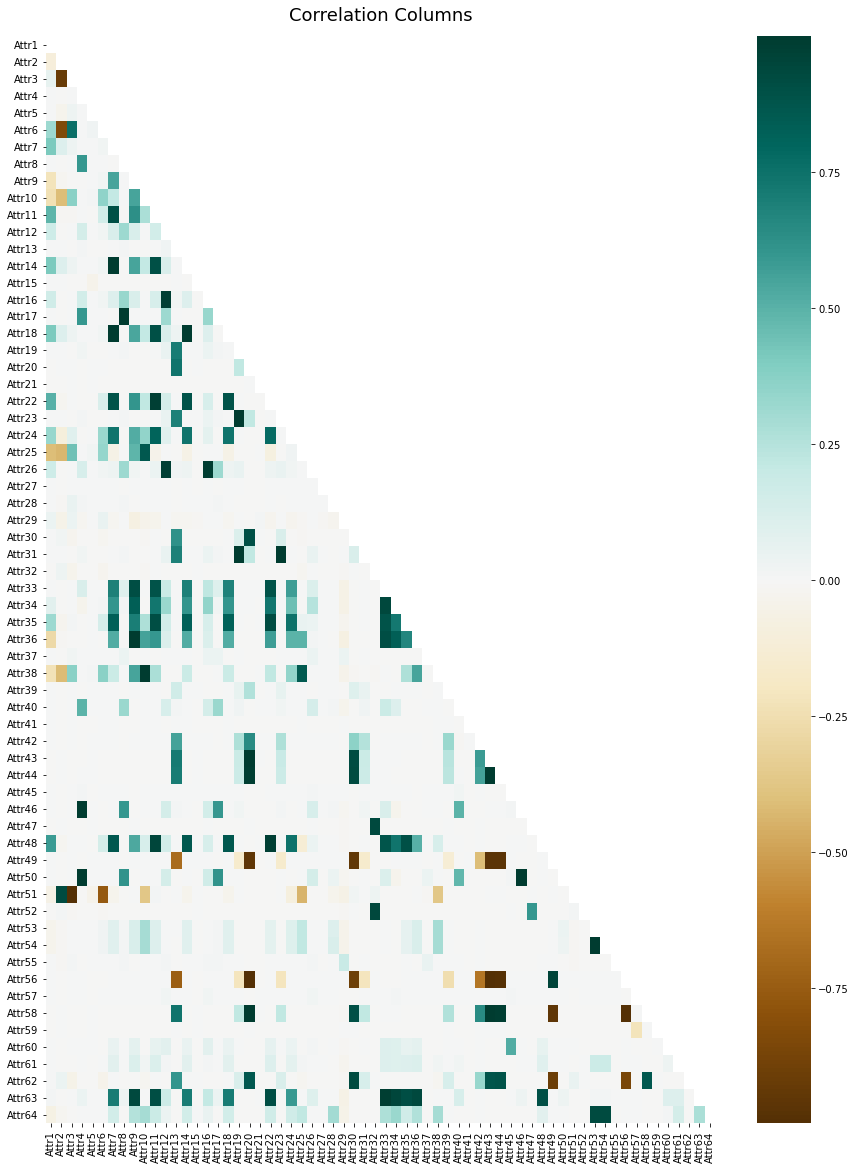

In [16]:
# look at correlation plot
import seaborn as sns
import matplotlib.pyplot as plt
corr = full_df.corr()
matrix = np.triu(corr)


f, ax = plt.subplots(figsize=(15,20))
heatmap = sns.heatmap(corr, annot=False, mask=matrix, cmap='BrBG')
heatmap.set_title('Correlation Columns', fontdict={'fontsize':18}, pad=16);
plt.show()

#### Interpretation
There are some highly correlated variables showing up in the heatmap... since there are so many, it makes sense to let the software pick out anything that is correlated over 95%. Decision trees are fairly robust to multicollinearity, but having so many variables in the model that essentially say the same thing will arbitrarily weight the model, placing unneeded importance on those variables that have high correlation with many other variables. 

In [17]:
# automating the process of removing highly correlated variables
corr_matrix = full_df.corr().abs() #get the correlation matrix with absolute values

# select just the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) 
#print(upper_tri) # view the columns

# get columns with over 0.95 (95%) correlation

#use list comprehension to get a list of ultra high correlated variables
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.95)] 

# print list of variables to drop from dataframe
print('\n These are the variables that are correlated over 95%:',to_drop)
corrs = len(to_drop)
print('\nThere are a total of %d variables to drop due to a correlation over 95 percent' % corrs)




 These are the variables that are correlated over 95%: ['Attr14', 'Attr16', 'Attr17', 'Attr18', 'Attr22', 'Attr23', 'Attr26', 'Attr31', 'Attr36', 'Attr38', 'Attr43', 'Attr44', 'Attr46', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr54', 'Attr56', 'Attr58', 'Attr63']

There are a total of 21 variables to drop due to a correlation over 95 percent


In [18]:
# drop the highly correlated columns
full_df.drop(columns = to_drop, inplace=True)
full_df.columns
features = full_df.columns

In [19]:
full_df.shape

(43405, 44)

## <font color='blue'>Data Evaluation/ Engineering Summary</font>
<b> Summarize the data being used in the case using appropriate mediums (charts, graphs, tables); address questions such as: Are there missing values?</b>    
   
Since there are missing values in every single line of data, we will utilize a SimpleImputer from Sklearn during data preprocessing to impute missing values in the features that remain in the data set.   
    
<b> Which variables are needed (which ones are not)?</b>  
   
We found there were 21 variables that had more than 95% correlation. The following list of variables was removed from the dataset:

    - ['Attr14', 'Attr16', 'Attr17', 'Attr18', 'Attr22', 'Attr23', 'Attr26', 'Attr31', 'Attr36', 'Attr38', 'Attr43', 'Attr44', 'Attr46', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr54', 'Attr56', 'Attr58', 'Attr63']
  
<b> What assumptions or conclusions are you drawing that need to be relayed to your audience?</b>   

There is an unequal class distribution of roughly 95% non-bankrupt to 5% bankrupt. Because of this, the data will need to be balanced for the Random Forest Classifier to appropriately perform where as the XGBoost is designed to work with unbalanced data. Futher, for Random Forest we can adjust the class_weight parameter so that each tree is balanced using "balance_subsample" to adjust for the imbalanced class distribution.

## <font color='blue'>Modeling Preparations</font>
   
<b>Which methods are you proposing to utilize to solve the problem?</b>    
   
We will use Random Forest and XGBoost which are both decision tree based algorithms that take different approaches to classifying data so it is a good exercise to compare the 2 side by side. 

   - Random Forest tends to perform better on balanced and preprocessed data where XGBoost is a better option for unbalanced data. Random Forest works in parallel by sampling the features and the data across a bunch of trees and then makes the final prediction. 
   - XGBoost is an iterative process that weights iterations with incorrect classification heavier and that ultimately helps it give more weight to the smaller class and less weight to the larger class. 

<b>Why is this method appropriate given the business objective?</b>

Decision trees in general are an excellent approach to this classification problem because they are somewhat interpretable even for a large number of features and they provide a list of important features. For this problem, XGBoost will more than likely be the better performing model over Random Forest since most companies do not go into bankrupcy (meaning the classes are highly imbalanced), 
 
   
<b> How will you determine if your approach is useful (or how will you differentiate which approach is more useful than another)? More specifically, what evaluation metrics are most useful given that the problem is a binary-classification one </b>

Since we don't know whether it's more beneficial to over or under predict companies that could go bankrupt, we will try to tune the models primarily for the maximum accuracy, balanced with precision and recall.

## <font color='blue'>Model Building & Evaluation</font>
- In this case, your primary task is to build both a Random Forest and XGBoost model to accurately predict bankruptcy and will involve the following steps:
    - Specify your sampling methodology
        - We will use a train/test split of 70/30 to split the data
        - Afterwards, the data is imputed to fill in missing values using a simple average
    - Setup your models - highlighting any important parameters
        - This will be discussed in the summary section for each model.
    - Analyze each model's performance - referencing your chosen evaluation metric (including supplemental visuals and analysis where appropriate)
        - This will be discussed in the summary section after all models have been run.

### RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = full_df.loc[:, full_df.columns != 'class'].values
y = full_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [21]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') # fill in missing values for X
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

In [22]:
rf_clf = RandomForestClassifier(class_weight = 'balanced_subsample', random_state=42)
rf_clf.fit(X_train, y_train)

rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [23]:
#get the important features
weights = rf_clf.feature_importances_
feature_names = full_df.loc[:,full_df.columns !='class'].columns
rfc_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
rfc_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

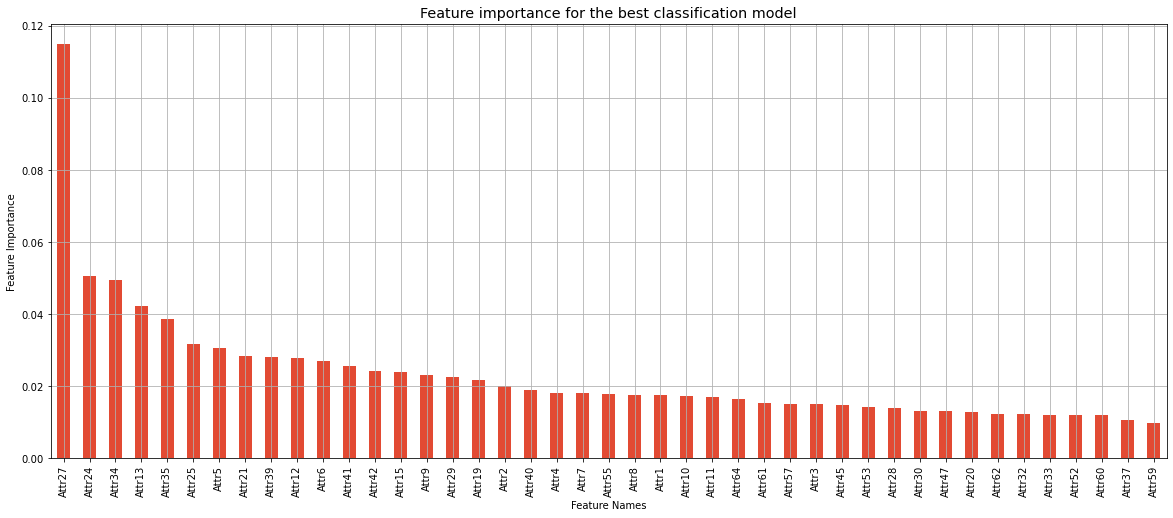

In [24]:
#Plot the model's feature importances
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,10))
plt.style.use('ggplot')
wt_plt_df = rfc_ft_imp_df
weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))
ax.set_title("Feature importance for the best classification model")
ax.set_ylabel("Feature Importance")
ax.set_xlabel("Feature Names")
ax.set_facecolor('white')
plt.show()

In [26]:
rf_clf.score(X_train, y_train)

0.9999341737155646

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_hat_rf_train = rf_clf.predict(X_train)
accuracy_score(y_hat_rf_train, y_train)

0.9999341737155646

In [28]:
confusion_matrix(y_train, y_hat_rf_train)

array([[28939,     0],
       [    2,  1442]], dtype=int64)

In [29]:
y_hat_rf_test = rf_clf.predict(X_test)
accuracy_score(y_hat_rf_test, y_test)

0.9593764398709875

In [30]:
confusion_matrix(y_test, y_hat_rf_test)

array([[12322,    53],
       [  476,   171]], dtype=int64)

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
#set the scoring parameters
scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score, average='weighted',zero_division=0),
          'recall': make_scorer(recall_score, average='weighted', zero_division=0),
          'f1_score': make_scorer(f1_score, average='weighted', zero_division=0)
          }


In [32]:
%%time
from sklearn.model_selection import cross_validate
#code for the Random Forest Model with Accuracy, Precision, Recall, F1, etc. training set
scores_bl = cross_validate(rf_clf, X_train, y_train, scoring=scorer, cv=5, return_train_score=True, n_jobs=-1)
acc_bl = round(scores_bl['test_accuracy'].mean()*100,2)
prec_bl = round(scores_bl['test_precision'].mean()*100,2)
rec_bl = round(scores_bl['test_recall'].mean()*100,2)
f1_bl = round(scores_bl['test_f1_score'].mean()*100,2)


Wall time: 9.95 s


In [33]:
print("Random Forest Accuracy Baseline", acc_bl)
print("Random Forest Precision Baseline", prec_bl)
print("Random Forest Recall Baseline", rec_bl)
print("Random Forest f1 score Baseline", f1_bl)

Random Forest Accuracy Baseline 96.04
Random Forest Precision Baseline 95.4
Random Forest Recall Baseline 96.04
Random Forest f1 score Baseline 95.02


In [34]:
%%time
from sklearn.model_selection import cross_validate
#code for the Random Forest Model with Accuracy, Precision, Recall, etc. test set
scores_bl = cross_validate(rf_clf, X_test, y_test, scoring=scorer, cv=5, return_train_score=True, n_jobs=-1)
acc_bl = round(scores_bl['test_accuracy'].mean()*100,2)
prec_bl = round(scores_bl['test_precision'].mean()*100,2)
rec_bl = round(scores_bl['test_recall'].mean()*100,2)
print("Random Forest Accuracy Baseline", acc_bl)
print("Random Forest Precision Baseline", prec_bl)
print("Random Forest Recall Baseline", rec_bl)


Random Forest Accuracy Baseline 95.94
Random Forest Precision Baseline 95.57
Random Forest Recall Baseline 95.94
Wall time: 3.99 s


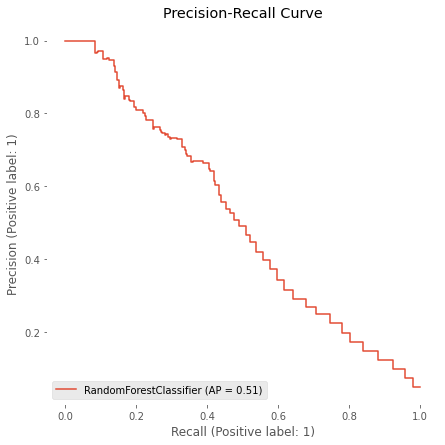

In [35]:
from sklearn.metrics import average_precision_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
disp = plot_precision_recall_curve(rf_clf, X_test, y_test, ax=ax)
disp.ax_.set_title('Precision-Recall Curve')
disp.ax_.set_facecolor('white')
plt.show()

#### RandomForest Classifier Summary
This is just an "out-of-the-box" RandomForest model with a balanced subsample (used to somewhat offset the unbalenced classes). This basic model had an accuracy of 95.94 and a precision and recall of 95.57 and 95.94 respectively.

---
### HyperTunning Random Forest
---

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [37]:
# set the tunining parameters for the random forest classifier GridSearchCV
tuned_parameters={'n_estimators':[10,50,100,300],
                  'criterion':['gini','entropy'], 
                  'max_depth':[5,10,20],
                  'min_samples_split':[2,4,9]} 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

In [39]:
%%time
import warnings
warnings.filterwarnings('ignore')

clf = GridSearchCV(RandomForestClassifier(class_weight = 'balanced_subsample'), 
                   tuned_parameters, cv=5, scoring=scorer, n_jobs=-1, refit='accuracy')
clf.fit(X_train, y_train)

Wall time: 6min 22s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 4, 9],
                         'n_estimators': [10, 50, 100, 300]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=weighted, zero_division=0),
                      'precision': make_scorer(precision_score, average=weighted, zero_division=0),
                      'recall': make_scorer(recall_score, average=weighted, zero_division=0)})

In [40]:
print("Best parameters set found on development set tuning for the best accuracy score:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
#print()
mean_acc = np.mean(clf.cv_results_['mean_test_accuracy'])
mean_prec = np.mean(clf.cv_results_['mean_test_precision'])
mean_rec = np.mean(clf.cv_results_['mean_test_recall'])
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print('Mean Accuracy: %0.3f (+/-%0.3f)' % (mean_acc, np.mean(clf.cv_results_['std_test_accuracy'])))
print('Mean Precission: %0.3f (+/-%0.3f)' % (mean_prec, np.mean(clf.cv_results_['std_test_precision'])))
print('Mean Recall: %0.3f (+/-%0.3f)' % (mean_rec, np.mean(clf.cv_results_['std_test_recall'])))
print("The scores are computed on the full evaluation set.")
print()



Best parameters set found on development set tuning for the best accuracy score:

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 100}

Grid scores on development set:
Detailed classification report:

The model is trained on the full development set.
Mean Accuracy: 0.900 (+/-0.005)
Mean Precission: 0.947 (+/-0.002)
Mean Recall: 0.900 (+/-0.005)
The scores are computed on the full evaluation set.



In [41]:
# predict using best RF classifer from GridSearchCV
rf_pred = clf.predict(X_test)

# print out results accuracy, prec, recall, f1 scores
print()
print(pd.DataFrame(confusion_matrix(y_test.astype('int'), rf_pred.astype('int'), labels=[0,1]),
            columns=['No Bankruptcy', 'Bankruptcy'],
            index=['No Bankruptcy', 'Bankruptcy']))
print('\nClassification Report:')
print(classification_report(y_test.astype('int'), rf_pred.astype('int')))


               No Bankruptcy  Bankruptcy
No Bankruptcy          13533          70
Bankruptcy               512         209

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     13603
           1       0.75      0.29      0.42       721

    accuracy                           0.96     14324
   macro avg       0.86      0.64      0.70     14324
weighted avg       0.95      0.96      0.95     14324



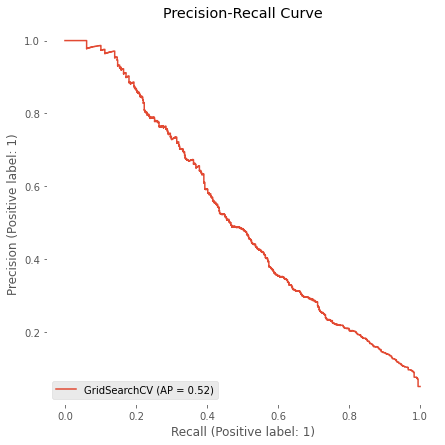

In [42]:
# generate prec-recall curve again
fig, ax = plt.subplots(figsize=(7,7))
disp = plot_precision_recall_curve(clf, X_test, y_test, ax=ax)
disp.ax_.set_title('Precision-Recall Curve')
disp.ax_.set_facecolor('white')
plt.show()

In [43]:
# predict probabilites of classifying (0,1) and use a threshold to increase recall
def tune_rf(X_test, threshold):
    threshold = threshold
    rf_scores = clf.predict_proba(X_test)
    predicted = (rf_scores[:,1] >= threshold).astype('int')

    # print out results accuracy, prec, recall, f1 scores
    print()
    print(pd.DataFrame(confusion_matrix(y_test.astype('int'), predicted, labels=[0,1]),
                       columns=['No Bankruptcy', 'Bankruptcy'],
                       index=['No Bankruptcy', 'Bankruptcy']))
    print('\nClassification Report:')
    print(classification_report(y_test.astype('int'), predicted))


In [44]:
tune_rf(X_test,0.34)


               No Bankruptcy  Bankruptcy
No Bankruptcy          13393         210
Bankruptcy               428         293

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     13603
           1       0.58      0.41      0.48       721

    accuracy                           0.96     14324
   macro avg       0.78      0.70      0.73     14324
weighted avg       0.95      0.96      0.95     14324



#### RandomForestClassifier Model Tuning
Our second model was tuned using GridSearchCV with 5-folds and refit based on the accuracy score. The grid search examined four parameters including the criterion, max depth, minimum samples to split on and the number of estimators. The set of parameter that returned the best accuracy were: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 100}. The model was further tuned using predicted probabilites and a threshold to manually increase the recall score without decreaing the accuracy score. The default threshold for RandomForest is 0.5 and the threshold is 0.34. By manually adjusting this, we improved the recall score from 28% to 42% while maintaining an accuracy score of 96%.

The final RandomForest model with tuned parameters returned an accuracy of .96, with a precision and recall of .95 and .96 respectively. This is a slight improvement on our untuned model. 

---
### XGBoost
---

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier

'''
Documentation
https://xgboost.readthedocs.io/en/latest/python/python_api.html
https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
additional instruction from async videos 8.5
'''


X = full_df.loc[:, full_df.columns != 'class'].values
y = full_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)



imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') # fill in missing values for X
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

# convert data into xgb format - this isn't needed with the sklearn wrapper
#dtrain = xgb.DMatrix(X_train, label=y_train) #training data
#dtest = xgb.DMatrix(X_test, label=y_test)  # test/ validation data

# run base model XGBoost

# initiate the model using the sklearn wrapper API
model = XGBClassifier(random_state=42, verbosity=1)
model.fit(X_train, y_train, verbose=True)
print('\n\n',model,'\n\n')

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test.astype('int'), y_pred.astype('int'))
precision = precision_score(y_test.astype('int'), y_pred.astype('int'))
recall = recall_score(y_test.astype('int'), y_pred.astype('int'))
print('Base Accuracy: %.2f%%' % (accuracy * 100.0))
print('Base Precision: %.2f%%' % (precision * 100.0))
print('Base Recall: %.2f%%' % (recall * 100.0))
print('\nConfusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test.astype('int'), y_pred.astype('int'), labels=[0,1]),
            columns=['No Bankruptcy', 'Bankruptcy'],
            index=['No Bankruptcy', 'Bankruptcy']))
print('\nClassification Report:')
print(classification_report(y_test.astype('int'), y_pred.astype('int')))

[09:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1) 


Base Accuracy: 96.58%
Base Precision: 81.99%
Base Recall: 41.05%

Confusion Matrix:
               No B

#### XGBoost Model Tuning
Our third model was an "out-of-the-box" XGBoost model the The model was further tuned using predicted probabilites and a threshold to manually increase the recall score without decreaing the accuracy score. The accuracy of the model was .96, with a precision and recall of .97 and .96 respectively, therefor the base XGBoost performed slightly better than the tuned RandomForest model. 

---
### GridSearch Hypertuning for XGBoost
---

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
%%time

# definte the classifier
xgb_class = XGBClassifier(booster = 'gbtree', random_state=42, verbosity=1)
#set the scoring parameters
scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score, average='weighted',zero_division=0),
          'recall': make_scorer(recall_score, average='weighted', zero_division=0)
         }

# tuning distribution for RandomSearchCV for XGBoost
params = {
    'n_estimators': [10, 100, 500],
    'max_depth': [x for x in range(2,12)],  # depth of the tree
    'learning_rate': [0.01, 0.001, 0.1, 0.3, 0.5]
}

# Create RandomizedSearchCV
random = RandomizedSearchCV(xgb_class, params, scoring=scorer, n_jobs=-1, refit='accuracy', 
                            cv=5, verbose=1, random_state=42, return_train_score=True)

random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[09:14:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 47s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=...
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 0.3,
                                                          0.5],
                                    

In [48]:
xgb_class

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=42, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=1)

In [49]:
print("Detailed classification report for RandomSearchCV using XGBoost:")
print()
print("The model is trained on the full development set.")
print('Best Estimator: ', random.best_estimator_,'\n')

# capture best results indices
best_acc_test = np.argmax(random.cv_results_['mean_test_accuracy'])
best_prec_test = np.argmax(random.cv_results_['mean_test_precision'])
best_recall_test = np.argmax(random.cv_results_['mean_test_recall'])


print('Best Accuracy: %0.3f%% (+/-%0.2f%%)' % 
      (random.best_score_*100,
       random.cv_results_['std_test_accuracy'][best_acc_test]*100))
print('Best Parameters: ', random.best_params_,'\n')


# Best Precision Score/ Params
print('Best Test by Precision: Test %d with Precision: %0.2f%%' % 
      (best_prec_test+1,
       random.cv_results_['mean_test_precision'][best_prec_test]*100))
print('Best Parameters by Precision: {\'n_estimators\': %d, \'max_depth\': %d, \'learning_rate\': %0.1f}' %
      (random.cv_results_['param_n_estimators'][best_prec_test],
       random.cv_results_['param_max_depth'][best_prec_test],
       random.cv_results_['param_learning_rate'][best_prec_test])
     )
print('\n')

# Best Recall Score/ Params
print('Best Test by Recall: Test %d with Recall: %0.2f%%' % 
      (best_recall_test+1,
       random.cv_results_['mean_test_recall'][best_recall_test]*100))

print('Best Parameters by Recall: {\'n_estimators\': %d, \'max_depth\': %d, \'learning_rate\': %0.1f}' %
      (random.cv_results_['param_n_estimators'][best_recall_test],
       random.cv_results_['param_max_depth'][best_recall_test],
       random.cv_results_['param_learning_rate'][best_recall_test])
     )

Detailed classification report for RandomSearchCV using XGBoost:

The model is trained on the full development set.
Best Estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1) 

Best Accuracy: 96.671% (+/-0.11%)
Best Parameters:  {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1} 

Best Test by Precision: Test 7 with Precision: 96.59%
Best Parameters by Precision: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


Best Test by Recall: Test 1 with

##### Predict Using best_params_

In [50]:
# predict with the best parameters from the random search cv
xg_pred = random.predict(X_test)
xg_acc = accuracy_score(y_test.astype('int'), xg_pred.astype('int'))
xg_precision = precision_score(y_test.astype('int'), xg_pred.astype('int'))
xg_recall = recall_score(y_test.astype('int'), xg_pred.astype('int'))

print("Detailed scoring for the Best results from RandomSearchCV using XGBoost:")
print()
print("The model is trained on the full development set.")
print('Accuracy: %0.3f' % xg_acc)
print('Precission: %0.3f' % xg_precision)
print('Recall: %0.3f' % xg_recall)

print("The scores are computed on the full evaluation set.")
print()
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test.astype('int'), xg_pred.astype('int'), labels=[0,1]),
      columns=['No Bankruptcy', 'Bankruptcy'],
      index=['No Bankruptcy', 'Bankruptcy']))
print('\nClassification Report:')
print(classification_report(y_test.astype('int'), xg_pred.astype('int')))

Detailed scoring for the Best results from RandomSearchCV using XGBoost:

The model is trained on the full development set.
Accuracy: 0.966
Precission: 0.951
Recall: 0.351
The scores are computed on the full evaluation set.

Confusion Matrix:
               No Bankruptcy  Bankruptcy
No Bankruptcy          13590          13
Bankruptcy               468         253

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13603
           1       0.95      0.35      0.51       721

    accuracy                           0.97     14324
   macro avg       0.96      0.67      0.75     14324
weighted avg       0.97      0.97      0.96     14324



### Further Model Tuning 
- Use scale_pos_weight to adjust for a better recall score while not drastically lowering the accuracy score

In [51]:
params = {'learning_rate': 0.1,
          'n_estimators': 100, 
          'max_depth': 6, 
          'scale_pos_weight': 5,
          'random_state': 42
}
eval_set = [(X_train, y_train),(X_test, y_test)]

tune_model = XGBClassifier(**params, verbosity = 0)
tune_model.fit(X_train, y_train)
#print('\n\n',tune_model,'\n\n')


tune_pred = tune_model.predict(X_test)

print('\nConfusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test.astype('int'), tune_pred.astype('int'), labels=[0,1]),
            columns=['No Bankruptcy', 'Bankruptcy'],
            index=['No Bankruptcy', 'Bankruptcy']))
print('\nBest Accuracy Score: %0.3f%%' % (random.best_score_*100))
print('\nClassification Report:')
print(classification_report(y_test.astype('int'), tune_pred.astype('int')))


Confusion Matrix:
               No Bankruptcy  Bankruptcy
No Bankruptcy          13367         236
Bankruptcy               361         360

Best Accuracy Score: 96.671%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     13603
           1       0.60      0.50      0.55       721

    accuracy                           0.96     14324
   macro avg       0.79      0.74      0.76     14324
weighted avg       0.96      0.96      0.96     14324



#### Comments on XGBoost Model Tuning
Our forth model was an XGBoost model tuned with the following parameters: n_estimators, max_depth, # depth of the tree, and learning rate using a RandomSearchCV with 5-folds. For maximum accuracy, {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1} were the parameters used. The model was further tuned using the scale_pos_weight parameter within xgboost to account for the imbalance in the target data. The model was manually fit starting with a weight of 2 and incremented by 1 until there was no more gain in recall without a loss in accuracy.

## <font color='blue'>Model Interpretbility & Explainability</font>

<b>Using at least one of your models above (if multiple were trained), which variable(s) was (were) "most important" and why?  How did you come to the conclusion and how should your audience interpret this?</b>  
We will focus on feature importance for our most balanced model - the double tuned XGBoost model. 
    - (1) The most important feature is Attr34 = operating expenses / total liabilities, which makes sense because if your liabilities are less than your expenses, you essentially do not have enough money to pay your bills and that puts you on the road to bankruptcy.   
    - (2) The next most important feature is Attr27 = profit on operating activities / financial expenses, showing that if a company is not profitable, it has a high propensity to default on it's financial obligations.   
    - (3) Attr5 = [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365. While this is more complex formula, it again provides a measure of how much money the company has to pay it's bills


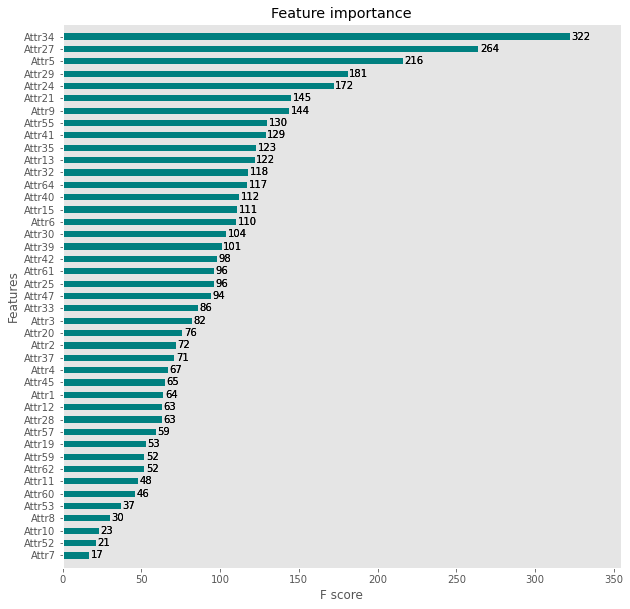

In [52]:
# plot important features
fig, ax = plt.subplots(figsize=(10,10))
# map reduced feature names to f#'s in plot
imp_feat = xgb.plot_importance(tune_model, ax=ax, grid=False, height=0.5, color='teal')
indices = [int(imp_feat.get_yticklabels()[i].get_text().lstrip('f')) for i in range(len(imp_feat.get_yticklabels()))]
mapped_features = [features[i] for i in indices]


ax = xgb.plot_importance(tune_model, ax=ax, grid=False, height=0.5, color='teal')
ax.set_yticklabels(mapped_features)

plt.show()


## <font color='blue'>Case Conclusions</font>
- After all of your technical analysis and modeling; what are you proposing to your audience and why?  
    - Decision makers for the company can take the general model that we created based on accuracy score, and use that to fit their needs. There will be a small percent of predictions where the company was predicted to go bankrupt but didn't, or was predicted to not go bankrupt but did. However, decision makers should at least be confident that the features being used for these predictions are genuinely the ones that have the most impact on which category a company will fall into. 
- How should they view your results and what should they consider when moving forward?  
    - They should consider the top 3 features of importance and perhaps look into those attribute categories further to determine if there's a reason for those specifice measures to be more impactful than attributes that measure similar things. 
    - Since there were originally 64 attributes of concern, narrowing the features of importance down to just 3-7 is highly interpretable and easy to incorporate into regular business practices. 
- Are there other approaches you'd recommend exploring?  
    - It might be beneficial to take the results of the study and continue to tune it to focus on correctly classifying 99.9%+ of companies that will go bankrupt. To do this would create a number of false positives, where it is predicted that the company will go bankrupt but it doesn't. However, this way of modeling would allow for decision makers to understand riskier investments/loans and keep a closer eye on those companies. 
- This is where you "bring it all home" in language they understand.
    - These models are highly interpretable and can be further customized to meet business needs. While no model is perfect, with decision trees we can build a variety of models that improve understanding of the existing problem and provide strong predictive power for the future.


